In [1]:
# Signaux sinusoidaux
#   Trouver la fréquence d'un signal
#   basé sur https://nanoconvergencejournal.springeropen.com/articles/10.1186/s40580-019-0197-y

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm

debug_aff = 1

In [2]:
## Generation des signaux sinusoïdaux
#   @freq : frequence du signal
#   @amplitude : amplitude du signal
#   @Fe : frequence d'echantillonnage
#   @N_points : nombre de points à générer
#   @bruit : pourcentage de bruit dans le signal
def generate_sinus(freq, amplitude, Fe, N_points, bruit = 0.1, phase = 0):
    temps = np.linspace(0, N_points*1/Fe, N_points)
    noise_sig = bruit*np.random.rand(len(temps))
    signal = amplitude * np.sin(2 * np.pi * freq * temps + phase) + noise_sig
    return (temps, signal)

## Test sinus
if debug_aff > 1:
    print('Essai sur sinus')
    (t, sig) = generate_sinus(10, 1, 10000, 2000)
    sig = sig.reshape(2000, 1)
    print(sig.shape)
    print('Affichage sinus test')
    plt.figure()
    plt.plot(t, sig)
    plt.show()



!! DATASET !!


100%|██████████| 1000/1000 [00:00<00:00, 3581.76it/s]


Shape of dataset
(10000, 4000, 1)
Shape of y_train
(10000,)
Affichage sinus 1


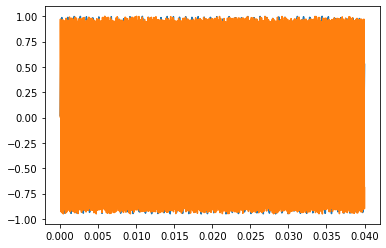

[0.41362044 0.15312146 0.2662427  ... 0.1177664  0.24372673 0.59051942]


In [3]:
## Generation du dataset d'entrainement
#   Generation des signaux

def generate_dataset(npoints, nb_echantillons):
    amp = 1
    fe = 100000
    X_signaux = np.empty([nb_echantillons, npoints, 1], dtype = float)
    y_signaux = np.empty([nb_echantillons], dtype = float)

    amp = 1.0
    nois = 0.05

    for ik in tqdm(range(nb_echantillons)):
        freq = 9000 * np.random.rand(1) + 1000
        y_signaux[ik] = freq/10000
        (t, sig) = generate_sinus(freq, amp, fe, npoints, bruit=nois, phase=0)
        sig = sig.reshape(len(t),1)
        X_signaux[ik,:] = sig

    return (t, X_signaux, y_signaux)

## Dataset generation
print('!! DATASET !!')
nbpoints = 4000
nbech_train = 10000
nbech_test = 1000
(t, train_data, y_train) = generate_dataset(nbpoints, nbech_train)
(t, test_data, y_test) = generate_dataset(nbpoints, nbech_test)
print('Shape of dataset')
print(train_data.shape)
print('Shape of y_train')
print(y_train.shape)

# Normalization
max_data = train_data.max()
train_data = train_data / max_data
test_data = test_data / max_data

if debug_aff >= 1:
    print('Affichage sinus 1')
    plt.figure()
    plt.plot(t, train_data[5,:])
    plt.plot(t, train_data[6,:])
    plt.show()

print(y_train)

In [4]:
## Tensorflow setup and training
print('Tensorflow')
# Model setup
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(nbpoints,1)))
model.add(tf.keras.layers.Dense(2))      # couche intermédiaire
model.add(tf.keras.layers.Dense(2))      # couche intermédiaire
model.add(tf.keras.layers.Dense(3))      # couche intermédiaire
model.add(tf.keras.layers.Dense(1))    # taille de sortie

# Model compilation
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())
model.summary()

print('Data shape')
print(train_data.shape)
print(y_train.shape)

# data normalization
max_data = train_data.max()
print('Max = '+str(max_data))
train_data = train_data / max_data
test_data = test_data / max_data

Tensorflow
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4000)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 8002      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 8,021
Trainable params: 8,021
Non-trainable params: 0
_________________________________________________________________
Data shape
(10000, 4000, 1)
(10000,)
Max = 1.0


2022-04-21 12:44:15.838587: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-04-21 12:44:17.763074: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-21 12:44:17.763692: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1996250000 Hz


Epoch 1/40
100/100 [==============================] - 3s 15ms/step - loss: 0.2719 - val_loss: 0.0012
Epoch 2/40
100/100 [==============================] - 1s 8ms/step - loss: 5.2024e-04 - val_loss: 2.1349e-04
Epoch 3/40
100/100 [==============================] - 1s 7ms/step - loss: 2.1909e-04 - val_loss: 2.2594e-04
Epoch 4/40
100/100 [==============================] - 0s 5ms/step - loss: 2.2926e-04 - val_loss: 2.4109e-04
Epoch 5/40
100/100 [==============================] - 0s 3ms/step - loss: 2.6716e-04 - val_loss: 2.9438e-04
Epoch 6/40
100/100 [==============================] - 0s 4ms/step - loss: 3.0162e-04 - val_loss: 3.4465e-04
Epoch 7/40
100/100 [==============================] - 0s 5ms/step - loss: 3.6608e-04 - val_loss: 3.4251e-04
Epoch 8/40
100/100 [==============================] - 0s 3ms/step - loss: 4.0071e-04 - val_loss: 4.8534e-04
Epoch 9/40
100/100 [==============================] - 0s 4ms/step - loss: 4.9095e-04 - val_loss: 5.6489e-04
Epoch 10/40
100/100 [==============

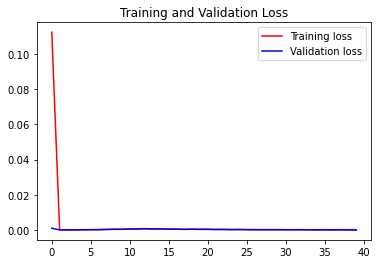

100%|██████████| 10/10 [00:00<00:00, 5094.50it/s]

Prediction par le modele
[6574. 2138. 2961. 2349. 9193. 2341. 6668. 9357. 5160. 2042.]
Vraies valeurs
[6348. 2154. 2910. 2082. 8643. 2261. 6527. 9122. 4909. 2019.]
[ 3.5498488  -0.74310948  1.73785126 12.79145704  6.35701555  3.50167698
  2.15860446  2.56863838  5.1165862   1.16123563]


In [5]:
# First Training
n_epoch = 40
history = model.fit(train_data, y_train, epochs=n_epoch, steps_per_epoch=100, validation_data=(test_data, y_test))
# avec verication sur données test

# Display of accuracy of the model in function of the epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.show()

## Signal prediction with trained model
(t, predic, y_predic) = generate_dataset(nbpoints, 10)
y_proba = model.predict(predic)
y_proba = y_proba.reshape(len(y_proba))
print('Prediction par le modele')
print(np.floor(y_proba*10000))
print('Vraies valeurs')
print(np.floor(y_predic*10000))
erreur = (y_proba-y_predic) / y_predic * 100
print(erreur)